In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import copy
from typing import List

In [2]:
df = pd.read_csv("data/diamonds.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


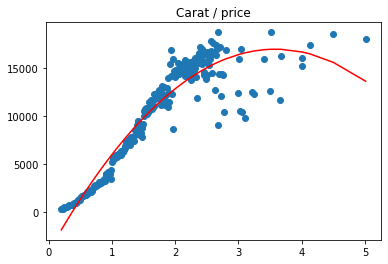

In [10]:
caratPriceDict = dict()
caratAmountDict = dict()

for index, row in df.iterrows():
    if row['carat'] not in caratPriceDict.keys():
        caratPriceDict[row['carat']] = 0
    if row['carat'] not in caratAmountDict.keys():
        caratAmountDict[row['carat']] = 0

    caratPriceDict[row['carat']] += row['price']
    caratAmountDict[row['carat']] += 1

caratPriceDict = {k: v/caratAmountDict[k] for k, v in caratPriceDict.items()}
caratPriceDict = dict(sorted(caratPriceDict.items()))

carat = list(caratPriceDict.keys())
price = list(caratPriceDict.values())

caratPrice = {"carat":carat, "price":price}
dfCaratPrice = pd.DataFrame(caratPrice)
dfCaratPrice.to_csv(r'output/caratPrice.csv', index=False)

plt.scatter(carat, price)
z = np.polyfit(carat, price, 2)
p = np.poly1d(z)
trend_h = p(carat)
plt.plot(carat,trend_h, "r-")
plt.title("Carat / price")
plt.show()